# Questions for This Dataset

The top 5 highest rated movies?  
The trend of top 10 Genres?  
The average revenue of top 10 directors?  
The relationship between budget and ratings?  
Which genre is becoming more popular?

# Import the Raw Data

In [1]:
import pandas as pd 

df = pd.read_csv("tmdb_movies.csv")

#Have a look at the data, limit to 5 rows.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Select only the columns that will be used to analyse.  

In [2]:
#display the position of all columns, easy to select.
df.columns.to_frame().reset_index()

,index,0
0,id,id
1,imdb_id,imdb_id
2,popularity,popularity
3,budget,budget
4,revenue,revenue
5,original_title,original_title
6,cast,cast
7,homepage,homepage
8,director,director
9,tagline,tagline


In [3]:
#choose the wanted columns
wanted_columns = [5, 8, 13, 16, 17, 18, 19, 20]
df_shorted = df.iloc[:, wanted_columns]
#check the result
display(df_shorted.shape)
df_shorted.head()

(10866, 8)

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#compare the runing time between original dataframe and shorted dataframe
import time
#shorted df
start_time = time.time()

df_shorted.isnull().any()

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

#original df
start_time = time.time()

df.isnull().any()

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 0.00699329 seconds
Elapsed time was 0.0169935 seconds


In [5]:
#save to shorted.csv
df_shorted.to_csv('shorted.csv', index = False)

# Clean the data

In [6]:
#import the shorted.csv
df = pd.read_csv('shorted.csv')

In [7]:
#check null values
df.isnull().any()

original_title    False
director           True
genres             True
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [8]:
#check the rows with null values
df[pd.isnull(df).any(axis=1)]

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,Belli di papÃ,Guido Chiesa,NaN,21,6.1,2015,0.000000e+00,0.000000e+00
532,Iliza Shlesinger: Freezing Hot,NaN,Comedy,14,6.6,2015,0.000000e+00,0.000000e+00
548,Sense8: Creating the World,NaN,Documentary|Science Fiction,12,7.5,2015,0.000000e+00,0.000000e+00
556,With This Ring,NaN,Comedy|Romance,14,6.5,2015,0.000000e+00,0.000000e+00
620,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,13,5.0,2015,0.000000e+00,0.000000e+00
997,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,NaN,13,6.8,2014,0.000000e+00,0.000000e+00
1032,Marvel Studios: Assembling a Universe,NaN,TV Movie|Documentary,32,6.3,2014,0.000000e+00,0.000000e+00
1054,Unlocking Sherlock,NaN,TV Movie|Documentary,11,7.2,2014,0.000000e+00,0.000000e+00
1203,Free to Play,NaN,Documentary,40,7.0,2014,1.381637e+05,0.000000e+00
1241,Dance-Off,NaN,Romance|Music|Comedy,18,5.7,2014,0.000000e+00,0.000000e+00


In [10]:
#delete the rows with null values
df = df.dropna(how='any')

In [11]:
#check the result
display(df.shape)
df.isnull().any()

(10801, 8)

original_title    False
director          False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [12]:
#check duplicates
df.duplicated().any().sum()

1

In [13]:
#take a look at the duplicated row
df[df.duplicated()]

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,TEKKEN,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [14]:
#drop duplicates
df = df.drop_duplicates()

In [15]:
#check the result
df.duplicated().any()

False

In [16]:
#save to cleaned.csv
df.to_csv('cleaned.csv', index=False)

# Import cleaned data

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
% matplotlib inline 

df = pd.read_csv('cleaned.csv')
display(df.shape)
df.head()

(10800, 8)

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


# Q1 The top 5 highest rated movies

In [18]:
#sort by vote_average
df_top_rated = df.sort_values(by=['vote_average'], ascending=False)
df_top_rated.head()

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3858,The Story of Film: An Odyssey,Mark Cousins,Documentary,14,9.2,2011,0.0,0.0
536,The Mask You Live In,Jennifer Siebel Newsom,Documentary,11,8.9,2015,0.0,0.0
1192,Black Mirror: White Christmas,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,0.0,0.0
2251,Life Cycles,Derek Frankowski,Documentary,27,8.8,2010,0.0,0.0
6857,Pink Floyd: Pulse,David Mallet,Music,23,8.7,2006,0.0,0.0


It can be noticed that the top 5 rated movies have quite small vote counts. It is necessary to look at the distribution of vote counts.

In [19]:
df.vote_count.describe()

count    10800.000000
mean       218.600741
std        577.165055
min         10.000000
25%         17.000000
50%         39.000000
75%        147.000000
max       9767.000000
Name: vote_count, dtype: float64

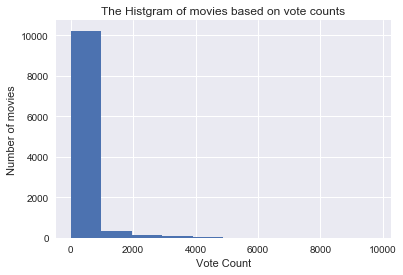

In [23]:
plt.hist(df.vote_count)
plt.title('The Histgram of movies based on vote counts')
plt.ylabel('Number of movies')
plt.xlabel('Vote Count');

C:\Users\Noah\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


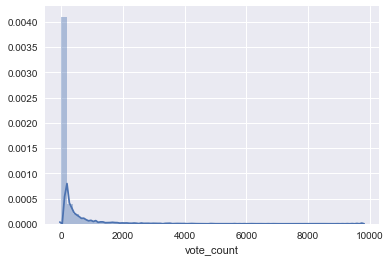

In [233]:
sns.distplot(df.vote_count);

In [20]:
#derive the top 5 rated movies in 4 groups divided by the quartiles 
criteria = ['vote_count <=17', 'vote_count > 17 and vote_count<=38', 'vote_count >38 and vote_count<=146', 'vote_count>146']
def top_5_movies(df):
    for c in criteria :
        group = df.query(c).sort_values(by=['vote_average'], ascending=False).head().reset_index().iloc[:, [1, 4, 5]]
        group.index=range(1,6)
        group.columns=['Title', 'Count', 'Rating']
        display(group)

top_5_movies(df)

,Title,Count,Rating
1,The Story of Film: An Odyssey,14,9.2
2,The Mask You Live In,11,8.9
3,Dave Chappelle: Killin' Them Softly,17,8.5
4,A Personal Journey with Martin Scorsese Throug...,11,8.5
5,Queen - Rock Montreal,14,8.5


,Title,Count,Rating
1,Life Cycles,27,8.8
2,Pink Floyd: Pulse,23,8.7
3,Tropico,24,8.4
4,Stop Making Sense,23,8.4
5,Iron Maiden: Flight 666,28,8.3


,Title,Count,Rating
1,Black Mirror: White Christmas,41,8.8
2,The Art of Flight,60,8.5
3,The Jinx: The Life and Deaths of Robert Durst,72,8.4
4,Dear Zachary: A Letter to a Son About His Father,74,8.3
5,World of Tomorrow,47,8.2


,Title,Count,Rating
1,The Shawshank Redemption,5754,8.4
2,The Godfather,3970,8.3
3,Whiplash,2372,8.2
4,Forrest Gump,4856,8.1
5,The Dark Knight,8432,8.1


# Q2 The trend of top 10 genres?

In [21]:
#choose top 10 genres based on counts
df_genres = df.genres.value_counts().to_frame().head(10)
df_genres

,genres
Drama,711
Comedy,707
Documentary,306
Drama|Romance,289
Comedy|Drama,280
Comedy|Romance,267
Horror|Thriller,259
Horror,253
Comedy|Drama|Romance,222
Drama|Thriller,138


In [22]:
#display the line chart of the top 10 genres
def trend(df):
    for genre in df_genres.index.tolist():
        #display(genre)
        df1 = df[df.genres==genre].groupby(['release_year']).count()[['genres']]
        plt.plot(df1.index, df1['genres'])
        #plt.xticks(df1.index)
        plt.xlabel('Year')
        plt.ylabel('Counts')
        plt.title('{} Movie Trend'.format(genre))
        plt.show()

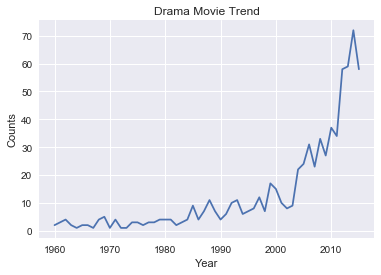

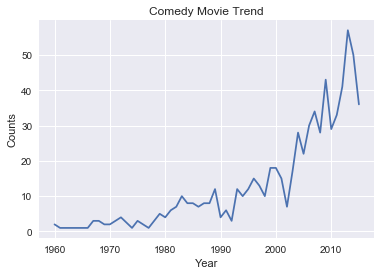

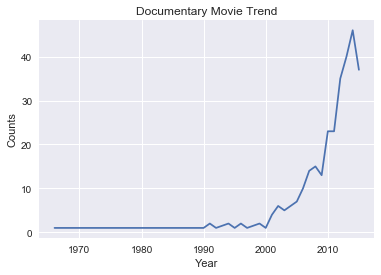

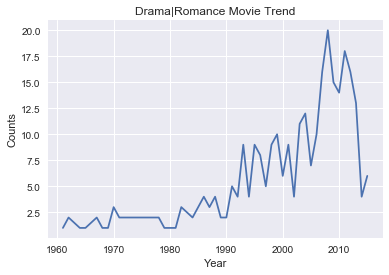

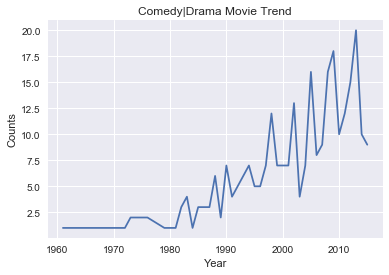

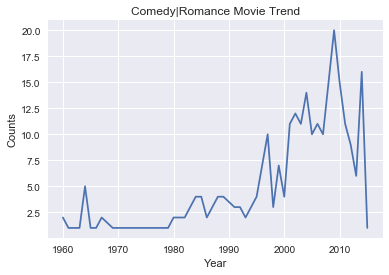

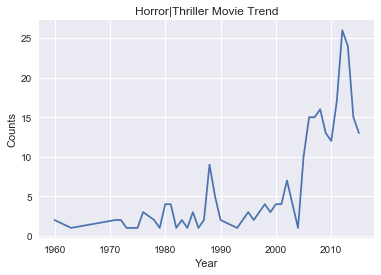

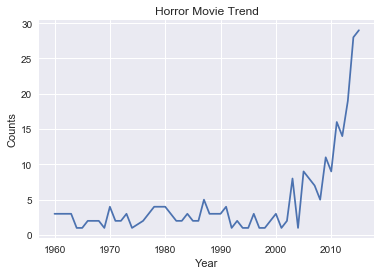

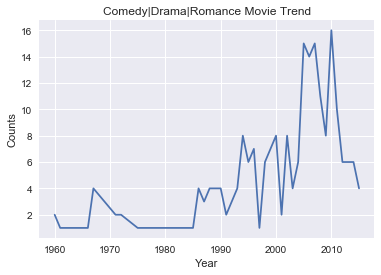

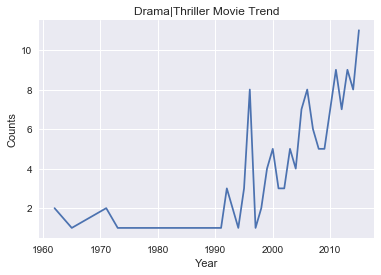

In [23]:
trend(df)

According to the graphs, the number of drama, comedy, documentary, horror movies have a dramastic increase.  
The number of drama and romance movie had a sharp decline after 2010.   
More data would  be needed to answer the why question.

# Q3 The relationship between director and revenues?  
Which director has the highest average revenue per movie.  
The average rating of their movies.

In [24]:
#find out the top 10 directors based on number of movies they have directed
top_10 = df.director.value_counts().head(10).index.tolist()
top_10

['Woody Allen',
 'Clint Eastwood',
 'Martin Scorsese',
 'Steven Spielberg',
 'Ridley Scott',
 'Steven Soderbergh',
 'Ron Howard',
 'Joel Schumacher',
 'Brian De Palma',
 'Wes Craven']

In [25]:
#filter the dataframe to includes only the top 10 directors
df_director = df[df.director.isin(top_10)]
df_director.head()

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,The Martian,Ridley Scott,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
33,Bridge of Spies,Steven Spielberg,Thriller|Drama,1638,7.1,2015,3.679998e+07,1.496016e+08
66,In the Heart of the Sea,Ron Howard,Thriller|Drama|Adventure|Action|History,805,6.4,2015,9.199996e+07,8.631506e+07
155,Irrational Man,Woody Allen,Mystery|Drama,319,6.1,2015,1.012000e+07,2.519979e+07
568,The Audition,Martin Scorsese,Comedy,10,6.1,2015,0.000000e+00,0.000000e+00


In [26]:
#calculate the average revenue based on directors, sort by revenue
avg_rev = df_director.groupby(['director']).revenue_adj.mean().to_frame().sort_values(by=['revenue_adj'], ascending=False).reset_index()
avg_rev.index = range(1,11)
avg_rev

,director,revenue_adj
1,Steven Spielberg,5.242223e+08
2,Ron Howard,2.057771e+08
3,Ridley Scott,1.834594e+08
4,Steven Soderbergh,1.125124e+08
5,Clint Eastwood,1.076379e+08
6,Joel Schumacher,9.975845e+07
7,Martin Scorsese,8.367386e+07
8,Brian De Palma,8.247938e+07
9,Wes Craven,6.214949e+07
10,Woody Allen,2.876045e+07


In [30]:
#The aveage rating of the top 10 directors
avg_rating = df_director.groupby(['director']).vote_average.mean().to_frame().sort_values(by=['vote_average'], ascending=False).reset_index()
avg_rating.index = range(1,11)
avg_rating

,director,vote_average
1,Martin Scorsese,6.958621
2,Steven Spielberg,6.824138
3,Clint Eastwood,6.508824
4,Ridley Scott,6.478261
5,Woody Allen,6.444444
6,Ron Howard,6.377273
7,Brian De Palma,6.355000
8,Steven Soderbergh,6.172727
9,Joel Schumacher,5.971429
10,Wes Craven,5.863158


In [102]:
#join those two dataframe together
result = pd.merge(avg_rev, avg_rating, on='director')
result

,director,revenue_adj,vote_average
0,Steven Spielberg,5.242223e+08,6.824138
1,Ron Howard,2.057771e+08,6.377273
2,Ridley Scott,1.834594e+08,6.478261
3,Steven Soderbergh,1.125124e+08,6.172727
4,Clint Eastwood,1.076379e+08,6.508824
5,Joel Schumacher,9.975845e+07,5.971429
6,Martin Scorsese,8.367386e+07,6.958621
7,Brian De Palma,8.247938e+07,6.355000
8,Wes Craven,6.214949e+07,5.863158
9,Woody Allen,2.876045e+07,6.444444


In [103]:
#to make the chart more readable
result.revenue_adj = result.revenue_adj/1e7
result

,director,revenue_adj,vote_average
0,Steven Spielberg,52.422230,6.824138
1,Ron Howard,20.577707,6.377273
2,Ridley Scott,18.345939,6.478261
3,Steven Soderbergh,11.251244,6.172727
4,Clint Eastwood,10.763792,6.508824
5,Joel Schumacher,9.975845,5.971429
6,Martin Scorsese,8.367386,6.958621
7,Brian De Palma,8.247938,6.355000
8,Wes Craven,6.214949,5.863158
9,Woody Allen,2.876045,6.444444


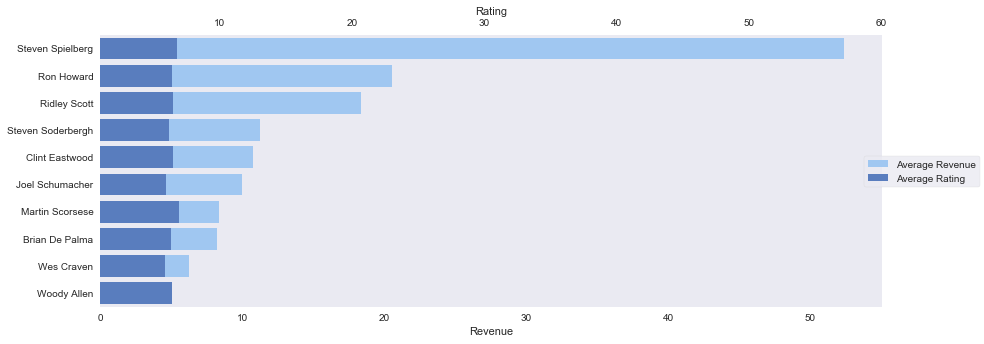

In [125]:
sns.set(style='dark')

fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#plot the revenue
sns.set_color_codes("pastel")
sns.barplot(x='revenue_adj', y='director', data = result, label="Average Revenue", color="b", ax=ax1)


#plot the rating
sns.set_color_codes('muted')
sns.barplot(x='vote_average', y='director', data = result, label='Average Rating', color='b', ax= ax2)

#add a legend and information axis label
#plt.title('Rating and Revenue of Top 10 directors', loc='right')
fig.legend(ncol=1, loc='right', frameon=True);
ax1.set(ylabel='', xlabel='Revenue');
ax2.set(xlim=(1,60), ylabel='', xlabel='Rating');


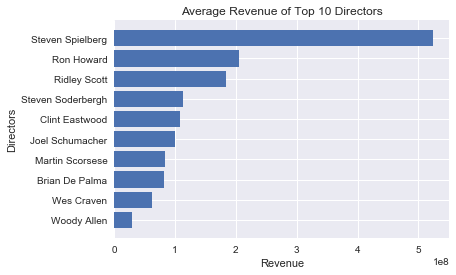

In [33]:
#only plot a horizontal bar chart of the revenue to display the result

directors = avg_rev.director
y_pos = np.arange(len(directors))
revenue = avg_rev.revenue_adj

plt.barh(y_pos, revenue)
plt.gca().invert_yaxis()
plt.title('Average Revenue of Top 10 Directors')

plt.yticks(y_pos, directors)
plt.ylabel('Directors')
plt.xlabel('Revenue')
plt.show()


# Q4 The relationship between revenue and ratings?

(2717, 8)


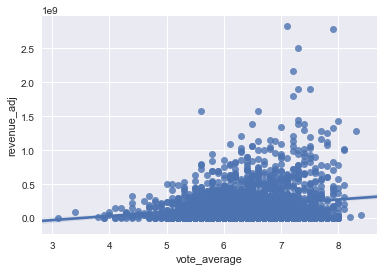

In [136]:
import seaborn as sns 
sns.set(color_codes=True)
df1 = df.query('vote_count >= 146')
print(df1.shape)
sns.regplot(y='revenue_adj', x='vote_average', data=df1);

No clear relationship between revenue and ratings.

# Q5 Which genre become more popular?

In [137]:
#get a set of genres
list_geners = df.genres.apply(lambda x: x.split("|")).tolist()
genres = set(x for l in list_geners for x in l)
genres = list(genres)
genres

['Comedy',
 'Thriller',
 'Science Fiction',
 'TV Movie',
 'Western',
 'Music',
 'Crime',
 'History',
 'Animation',
 'War',
 'Adventure',
 'Documentary',
 'Action',
 'Drama',
 'Family',
 'Mystery',
 'Foreign',
 'Horror',
 'Romance',
 'Fantasy']

In [138]:
#assign 1 or 0 to each genre to count
def genre_count(df):
    for genre in genres:
        df[genre] =(df.genres.str.contains(genre)).map({False: 0, True: 1})

In [175]:
def table(df):
    appended_data = []
    for year in range(2005,2015):
        df1 = df.query('release_year =={}'.format(year)).copy()
        genre_count(df1)
        #display(df1.head(1))
        df2 = df1.iloc[:, 8:].astype(int)
        count = df2.sum().to_frame().T
        count.index =[year]
       #display(df2.head(1))
        total = count.sum(axis=1).tolist()[0]
        count = count/total
        #display(count.head())
        appended_data.append(count)
        #display(appended_data) 
    df3 = pd.concat(appended_data)
    #display(df_genres)
    return df3


In [197]:
df3 = table(df)
df4 = df3[df3>0.05].dropna(axis=1)
df4

,Comedy,Thriller,Action,Drama,Horror
2005,0.152941,0.098396,0.074866,0.194652,0.059893
2006,0.148467,0.109195,0.076628,0.188697,0.053640
2007,0.135426,0.110314,0.084305,0.176682,0.069955
2008,0.135179,0.103420,0.079805,0.188925,0.061889
2009,0.146558,0.116210,0.079941,0.164323,0.066617
2010,0.140821,0.111484,0.088852,0.174350,0.065381
2011,0.134691,0.114330,0.090055,0.167580,0.061081
2012,0.137795,0.125984,0.077953,0.182677,0.081890
2013,0.126093,0.127551,0.086735,0.184402,0.074344
2014,0.125941,0.122519,0.088296,0.194387,0.071869


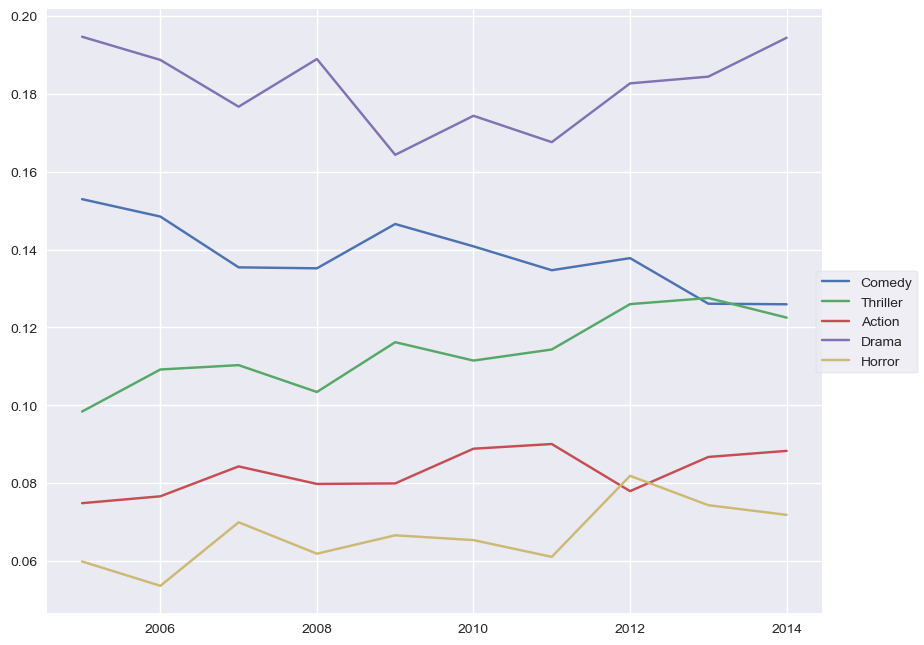

In [239]:
fig = plt.figure(figsize=(10,8), dpi=100)
ax = plt.subplot(111)
ax.plot(df4)
fig.legend(loc='right', labels=df4.columns, frameon=True)
plt.show()

It can be noticed that the overall proportion of the above genres have not changed too much from 2006-2014.   
The ranking remain the same as drama comes the first, followed by comedy, thriller, action and horror.  
Drama remained in the first the whole period. Thriller became the second in 2013, while thirller became third.  
In 2012, horror became fourth, ranked before action.